In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
#Loading the dataset
e = pd.read_csv('earthquake.csv')

In [18]:
e

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,City
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",India
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",India
3,2021-07-30 03:33:16 IST,27.90,94.20,10.0,3.0,"48km W of Basar, Arunachal Pradesh, India",India
4,2021-07-29 18:47:30 IST,26.60,92.51,28.0,3.1,"28km WSW of Tezpur, Assam, India",India
...,...,...,...,...,...,...,...
1605,2019-08-04 06:56:19 IST,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl...",India
1606,2019-08-04 05:40:33 IST,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India",India
1607,2019-08-03 16:29:37 IST,22.50,88.10,10.0,3.6,"28km WSW of Kolkata, India",India
1608,2019-08-03 01:59:11 IST,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India",India


In [19]:
#Performing feature analysis based on 'Depth' column
#For simplicity, categorizing the attribute depth into shallow, moderate, and deep
depth_bins = [-np.inf, 50, 150, np.inf]
depth_labels = ['Shallow', 'Moderate', 'Deep']
e['Depth_Category'] = pd.cut(e['Depth'], bins = depth_bins, labels = depth_labels)

In [20]:
#One-hot encoding of the depth category
e = pd.get_dummies(e, columns = ['Depth_Category'], drop_first = True)

In [21]:
#Extracting the features and the target variable
features = ['Latitude', 'Longitude', 'Magnitude', 'Depth_Category_Moderate', 'Depth_Category_Deep']
X = e[features]
Y = e['Magnitude']

In [22]:
#Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 40)

In [23]:
#Standardizing the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
#Training the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [25]:
#Making predictions on the testing sets
Y_pred = model.predict(X_test_scaled)

In [26]:
#Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

In [27]:
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  4.9204280258690245e-31
R^2 Score:  1.0
Mean Absolute Error:  5.044274177101255e-16


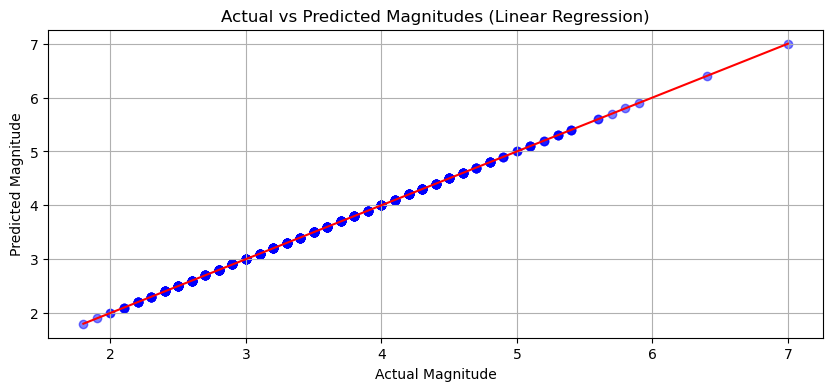

In [28]:
#Plotting of the actual vs the predicted values
plt.figure(figsize = (10, 4))
plt.scatter(Y_test, Y_pred, color = 'blue', alpha = 0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = 'red')
plt.title('Actual vs Predicted Magnitudes (Linear Regression)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.grid(True)
plt.show()